In [1]:
using Pkg
Pkg.add("PyPlot") # adds a plotting package
Pkg.update() # updates all packages
using PyPlot

  Updating registry at `~/.julia/registries/General`
  Updating git-repo `https://github.com/JuliaRegistries/General.git`
Fetching: [========================================>]  100.0 %.0 %                                 ]  15.5 %                     ]  45.4 %=========================>               ]  61.0 %]  76.4 %>  ]  93.1 % Resolving package versions...
 Installed Compat ───────── v1.4.0
 Installed JSON ─────────── v0.20.0
 Installed BinaryProvider ─ v0.5.3
 Installed FileIO ───────── v1.0.3
 Installed GR ───────────── v0.36.0
  Updating `~/.julia/environments/v1.0/Project.toml`
  [5789e2e9] ↑ FileIO v1.0.2 ⇒ v1.0.3
  Updating `~/.julia/environments/v1.0/Manifest.toml`
  [b99e7846] ↑ BinaryProvider v0.5.2 ⇒ v0.5.3
  [34da2185] ↑ Compat v1.3.0 ⇒ v1.4.0
  [5789e2e9] ↑ FileIO v1.0.2 ⇒ v1.0.3
  [28b8d3ca] ↑ GR v0.35.0 ⇒ v0.36.0
  [682c06a0] ↑ JSON v0.19.0 ⇒ v0.20.0
  Building GR → `~/.julia/packages/GR/wFd9A/deps/build.log`
  Updating registry at `~/.julia/registries/General`
  Updat

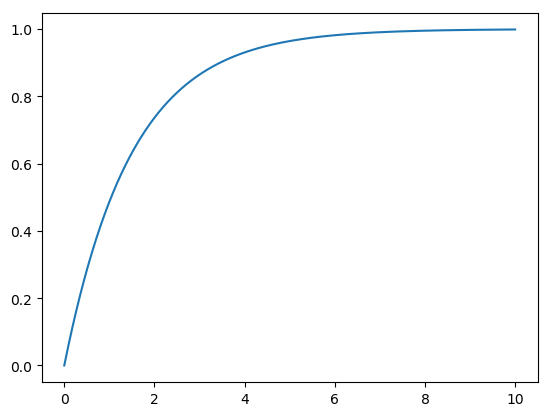

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f75ee857b00>

In [2]:
x=0:0.01:10
y=1 .- exp.(-x/1.5)
plot(x,y)

In [3]:
using Random
using PyPlot

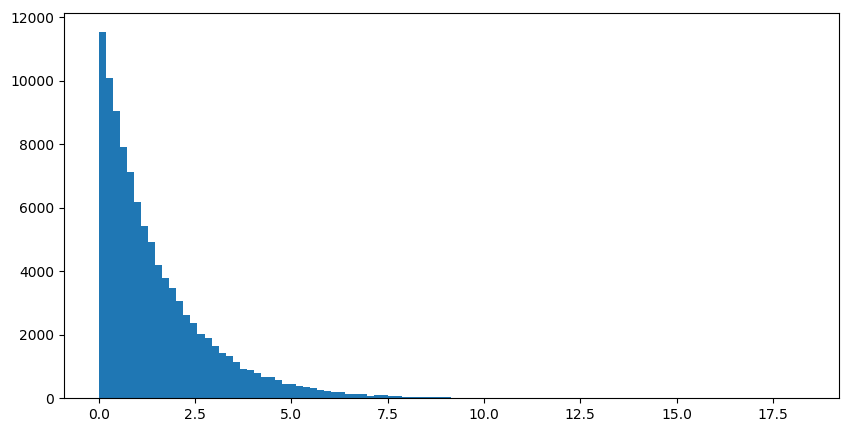

([11548.0, 10086.0, 9033.0, 7925.0, 7142.0, 6178.0, 5441.0, 4913.0, 4206.0, 3800.0  …  0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0], [1.51884e-6, 0.182911, 0.36582, 0.54873, 0.731639, 0.914548, 1.09746, 1.28037, 1.46328, 1.64619  …  16.6448, 16.8277, 17.0106, 17.1935, 17.3764, 17.5593, 17.7422, 17.9251, 18.108, 18.2909], PyCall.PyObject[PyObject <matplotlib.patches.Rectangle object at 0x7f75ee7e80b8>, PyObject <matplotlib.patches.Rectangle object at 0x7f75ee7dfe48>, PyObject <matplotlib.patches.Rectangle object at 0x7f75ee7e86a0>, PyObject <matplotlib.patches.Rectangle object at 0x7f75ee7e89e8>, PyObject <matplotlib.patches.Rectangle object at 0x7f75ee7e8d30>, PyObject <matplotlib.patches.Rectangle object at 0x7f75ee7f40f0>, PyObject <matplotlib.patches.Rectangle object at 0x7f75ee7f4470>, PyObject <matplotlib.patches.Rectangle object at 0x7f75ee7f47f0>, PyObject <matplotlib.patches.Rectangle object at 0x7f75ee7f4b70>, PyObject <matplotlib.patches.Rectangle object at 0x7f75ee7f4ef

In [4]:
rng = MersenneTwister(1234)
y=rand!(rng, zeros(100000))
figure(figsize=(10,5))
h = plt[:hist](-1.5.* log.(1 .- y),100)

## Gamma Distribution

In [5]:
Pkg.add("SpecialFunctions")
Pkg.add("Distributions")
using SpecialFunctions

 Resolving package versions...
  Updating `~/.julia/environments/v1.0/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.0/Manifest.toml`
 [no changes]
 Resolving package versions...
  Updating `~/.julia/environments/v1.0/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.0/Manifest.toml`
 [no changes]


In [6]:
stepsize=0.001
maxx=10
xx=0:stepsize:maxx
α=5
β=2
gammaxx=(1/(gamma(α))).* (β .^(α)) .* xx.^(α-1) .* exp.(- β .* xx) .*stepsize
cumuxx=cumsum(gammaxx)



10001-element Array{Float64,1}:
 0.0                   
 1.3306693315564444e-15
 2.2578839770894933e-14
 1.2993277988871994e-13
 4.685463401531034e-13 
 1.2935878682774102e-12
 3.0009757881028264e-12
 6.157802726469669e-12 
 1.15324500637316e-11  
 2.0124394774802012e-11
 3.319371041889208e-11 
 5.22902641274051e-11  
 7.928261143079178e-11 
 ⋮                     
 0.9999827642590925    
 0.9999827921843343    
 0.9999828200649419    
 0.9999828479009858    
 0.9999828756925359    
 0.9999829034396622    
 0.9999829311424349    
 0.9999829588009235    
 0.9999829864151978    
 0.9999830139853272    
 0.9999830415113815    
 0.9999830689934297    

In [7]:
function getIndex(rangee, num, highestNum)
    count=0
    for i in rangee
       count=count+1
        if num<i
            return count*highestNum
        end
    end
end

print(getIndex(cumuxx, 0.01, stepsize))


0.641

In [8]:
gammayy=zeros(length(xx))
for i in 1:length(gammayy)
    gammayy[i]=getIndex(cumuxx, rand(), stepsize)
end


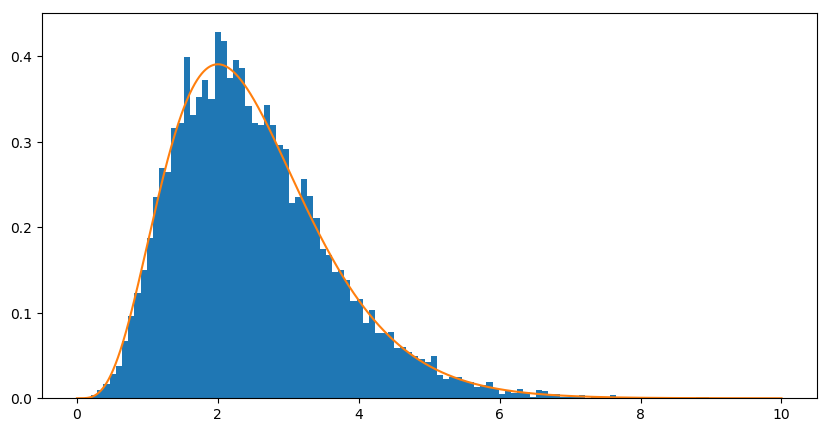

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f75f0ac5d30>

In [9]:
figure(figsize=(10,5))
plt[:hist](gammayy,100, density=true)
plot(xx, gammaxx/stepsize)

# 2.1.4

In [10]:
Pkg.add("StatsBase")
using StatsBase

 Resolving package versions...
  Updating `~/.julia/environments/v1.0/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.0/Manifest.toml`
 [no changes]


In [11]:
α1=0.5
β1=0.5
α2=5.0
β2=5.0

mean1=α1/β1
mean2=α2/β2


1.0

# 2.4.1 House Prices

In [12]:
using DelimitedFiles
using Statistics
using StatsBase
using Distributions

In [13]:
M=readdlm("HousePrices.csv", ',')
L,V=size(M)

(104308, 16)

In [14]:
#One House Example
M[1,:]

16-element Array{Any,1}:
       "{773788C2-3852-2CE4-E053-6C04A8C05E57}"
 148950                                        
       "2004-07-16 00:00"                      
       "BS22 9HQ"                              
       "T"                                     
       "N"                                     
       "F"                                     
      1                                        
       ""                                      
       "SAVERNAKE ROAD"                        
       ""                                      
       "WESTON-SUPER-MARE"                     
       "NORTH SOMERSET"                        
       "NORTH SOMERSET"                        
       "A"                                     
       "A"                                     

In [15]:
function getAllPrices(MM)
    count=0
    for i in 1:size(M)[1]
        if MM[i,2]<2000000 
            count=count+1
        end
    end
    array=zeros(count)
    count=1
    for i in 1:size(M)[1]
        if MM[i,2]<2000000 
            array[count]=MM[i,2]
            count=count+1
        end
    end
    return array
end

function getmSamplesn(population, m, n)
    array = zeros(m, n)
    for i in 1:m
        array[i, :]=sample(population, n)
    end
    return array
end
function Gaussian(μ, var, x)
    return 1/sqrt(2*pi*var)*exp(-((x-μ)^2)/(2*var))
end

Gaussian (generic function with 1 method)

In [16]:
MClean=getAllPrices(M)
MMean=mean(MClean)
MVar=var(MClean)

5.189966652197273e10

In [17]:
#m=Number of Samples, n=size of Samples
m=10000
n=100

MN=getmSamplesn(MClean, m, n)
SampleMeans=mean(MN, dims=2)
SampleVariance=var(MN, dims=2)

10000×1 Array{Float64,2}:
 8.926325941605905e10 
 3.53796983695429e10  
 4.85428022473393e10  
 3.421740462205449e10 
 3.340903229708478e10 
 4.138936733910148e10 
 6.845622060498013e10 
 4.369267069556573e10 
 4.8887809482199066e10
 3.936750902208091e10 
 7.867031360201566e10 
 4.587625263423551e10 
 5.202423713879226e10 
 ⋮                    
 5.073650199311869e10 
 4.07568655213669e10  
 3.790156073648272e10 
 3.187111352955259e10 
 1.0226186172213135e11
 6.261032400725764e10 
 4.3398474422613594e10
 7.291062329033066e10 
 5.3116542535159195e10
 6.209565106258281e10 
 5.631130494536732e10 
 3.9342718610248436e10

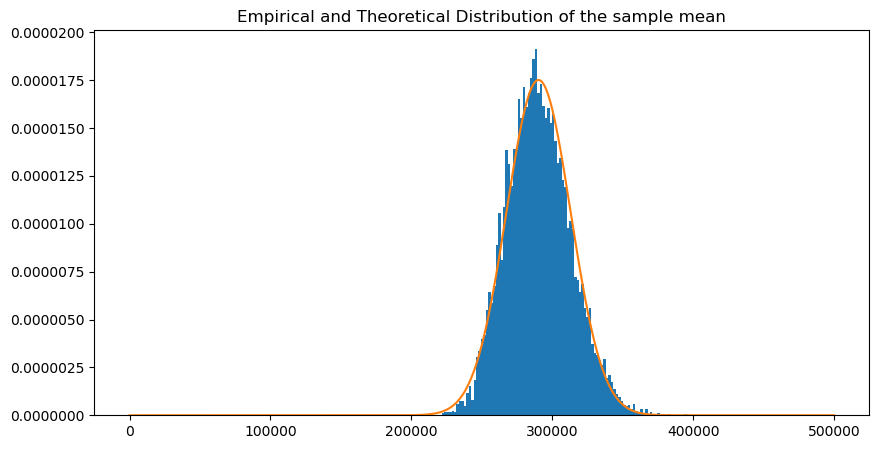

PyObject Text(0.5,1,'Empirical and Theoretical Distribution of the sample mean')

In [18]:
figure(figsize=(10,5))
plt[:hist](SampleMeans,100, density=true)
plt[:plot](1:1:500000, Gaussian.(MMean, MVar/n, 1:1:500000))
title("Empirical and Theoretical Distribution of the sample mean")
#plt[:hist](SampleVariance,Int64(100), density=true)

# 2.4.2

In [19]:
d=fit(Gamma, MClean)
l=fit(LogNormal, MClean)


LogNormal{Float64}(μ=12.324190021029747, σ=0.7643780833082149)

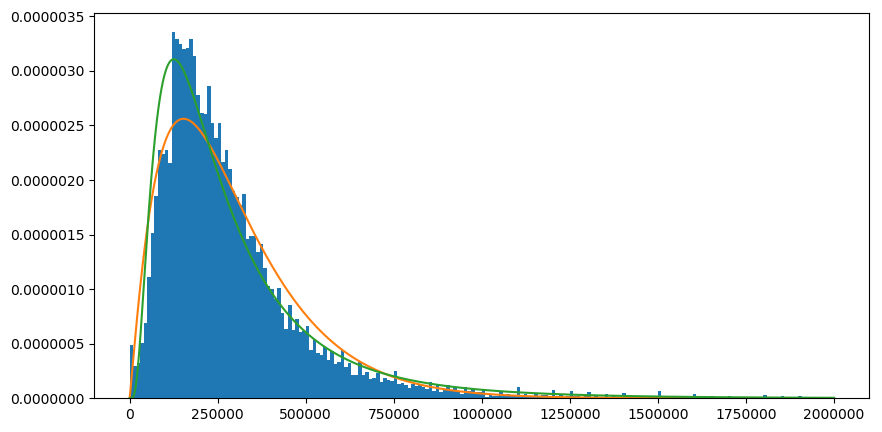

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f75ee502198>

In [20]:
xX=0:1:2000000
alpha=d.α
bet=1/d.θ
figure(figsize=(10,5))
plt[:hist](MClean, 200, density=true)
plt[:plot](xX, (1/(gamma(alpha))).* (bet .^(alpha)) .* xX.^(alpha-1) .* exp.(- bet .* xX))
plt[:plot](xX, 1 ./(xX*l.σ*sqrt(2*π)) .* exp.(-(log.(xX) .-l.μ).^2 ./(2*(l.σ)^2)))



# 3.1.1 

In [21]:
nDist=Normal(281000,6900)
upperbound=invlogcdf(nDist, log(0.975))
lowerbound=invlogcdf(nDist, log(0.025))
print(lowerbound)
print("   ")
print(upperbound)

267476.2485066736   294523.7514933264

In [22]:
Choko=Normal(101, 5/10)
low=invlogcdf(Choko, log(0.005))
up=invlogcdf(Choko, log(0.995))
print(low)
print("   ")
print(up)

99.71208534822556   102.28791465177444

In [23]:
#conditional probabilit
Error1=0.02/0.9
Error2=0.04/0.92

0.043478260869565216

# 3.2.2

In [24]:
sMES=7/sqrt(30)

pValue=2*(1-cdf(Normal(72, sMES), 75))
print("Upper bound is ")
print(invlogcdf(Normal(72,sMES), log(0.975)))
print("     The p-value is ")
print(pValue)

Upper bound is 74.50487180120402     The p-value is 0.018905840778331795

# 3.2.3

In [25]:
p=0.5
n=100
fair_dist=Binomial(n,p)
alpha=2*cdf(fair_dist, 39)

#type 2 error
bias_dist=Binomial(n,0.6)
beta=cdf(bias_dist,60)-cdf(bias_dist,39)

0.5379066176516065

# Q3.1 Spotting Fake Financial Data

In [26]:
using StatsBase

In [303]:
Fin=readdlm("companylist.csv", ',')
NAcount=0
for i in 1:length(Fin[:,3])
    if Fin[i,3]=="n/a"
        NAcount=NAcount+1
    end
end
size(Fin)

(3427, 10)

In [304]:

for i in 1:(size(Fin,1)-NAcount)
    if Fin[i,3] == "n/a"
        Fin=Fin[1:size(Fin,1) .!= i,: ]
    end
end
size(Fin)

(3421, 10)

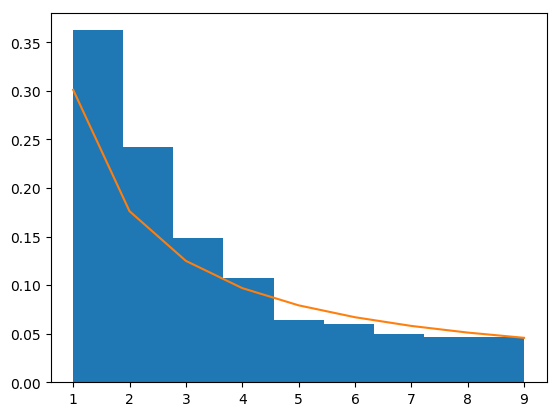

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f75932e0438>

In [305]:
sampleSize=1000
samp=sample(Fin[:,3], sampleSize)
samp = [d[end] for d in digits.(Int.(floor.(samp.*1000)))] #first digits
plt[:hist](samp, 9, density=true)
plt[:plot](1:9, log.(10, 1 .+ 1 ./(1:9)))



### Chi-Square Test

In [306]:
digitRange=collect(1:9)
HisArray=fit(Histogram, samp, nbins=9).weights
HisArray=HisArray./sum(HisArray)
uniform=ones(9) ./9
benford=log.(10, 1 .+ 1 ./(1:9))
ChiUni=sampleSize*sum(((HisArray .- uniform).^2)./(uniform))
ChiBenford=sampleSize*sum(((HisArray .- benford).^2)./(benford))
pUni=1-cdf(Chisq(8), ChiUni)
pBenford=1-cdf(Chisq(8),ChiBenford)

print(pUni)
print("      ")
print(pBenford)

0.0      0.0012786796266121003

# Q3.2

In [32]:
sMES=7/sqrt(30)

pValue=1-cdf(Normal(72, sMES), 75)
#print(invlogcdf(Normal(72,sMES), log(0.95)))
print("    ")
print(pValue)

#The school is underperforming for both 5% and 1% significances. This is a one-sided test

    0.009452920389165897

# Q3.3

The expression

$$\frac{1}{\sqrt{v  \pi}} \frac{\Gamma{\left( \frac{v+1}{2} \right)}}{\Gamma{\left( \frac{v}{2} \right)}} \frac{1}{\left( 1+ \frac{t^{2}}{v} \right)^{(v+1)/2}}$$

can be split up into to factors $\frac{1}{\sqrt{v  \pi}} \frac{\Gamma{\left( \frac{v+1}{2} \right)}}{\Gamma{\left( \frac{v}{2} \right)}} $ and $ \frac{1}{\left( 1+ \frac{t^{2}}{v} \right)^{(v+1)/2}}$

The left factor can be expressed as follows

$$\frac{1}{\sqrt{v  \pi}} \frac{\Gamma{\left( \frac{v+1}{2} \right)}}{\Gamma{\left( \frac{v}{2} \right)}} = \frac{1}{\sqrt{v  \pi}} \exp{\ln{\frac{\Gamma{\left( \frac{v+1}{2} \right)}}{\Gamma{\left( \frac{v}{2} \right)}}}}= \frac{1}{\sqrt{v  \pi}} \exp{ \left[ \ln{\Gamma{\left( \frac{v+1}{2} \right)}}-\ln{\Gamma{\left( \frac{v}{2} \right)}}\right]}$$ 

We can use Sterling's approximation to get the leading orders of the Gamma function for large arguments:

$$ \ln{\Gamma{n}} = n\ln{n}-n +\mathcal{O} (\ln{n}). $$

Thus up to order $n$ in the exponent we obtain

$$ \frac{1}{\sqrt{v  \pi}} \exp{\left[ \frac{v+1}{2} \ln{\left(\frac{v+1}{2}\right)} - \frac{v+1}{2} - \left(\frac{v}{2} \ln{\left(\frac{v}{2}\right)} -\frac{v}{2}  \right) + \mathcal{O}(\ln{\frac{v}{2}}) \right]}  $$

Breaking up all logarithms into sums yields

$$  \frac{1}{\sqrt{v  \pi}} \exp{ \left[ \frac{v}{2} \left( \ln{v} + \ln{\left( 1+ \frac{1}{v} \right)} -\ln{2} \right) + \frac{1}{2}  \left( \ln{v} + \ln{\left( 1+ \frac{1}{v} \right)} -\ln{2} \right) -\frac{v}{2}\ln{v} +\frac{v}{2} +\frac{v}{2}\ln{2} -\frac{v}{2}-\frac{1}{2}+  \mathcal{O}(\ln{\frac{v}{2}})  \right]} $$

$$= \frac{1}{\sqrt{v  \pi}} \exp{ \left[ \frac{v}{2} \ln{\left( 1+ \frac{1}{v} \right)} + \frac{1}{2}  \left( \ln{v} + \ln{\left( 1+ \frac{1}{v} \right)} -\ln{2} \right)-\frac{1}{2} + \mathcal{O}(\ln{\frac{v}{2}})  \right]} $$

Taylor expand the logarithms of the form $\ln{1+\frac{1}{v}}$ retaining all terms in the exponent of order $1$ and above, yielding:

$$ \frac{1}{\sqrt{v  \pi}} \exp{ \left[ \frac{1}{2}  + \frac{1}{2}  \left( \ln{v}  -\ln{2} \right)-\frac{1}{2} + \mathcal{O}(\ln{\frac{v}{2}})  \right]}
= \frac{1}{\sqrt{v  \pi}} \exp{ \left[ \frac{1}{2}  \left( \ln{v}  -\ln{2} \right)+ \mathcal{O}(\ln{\frac{v}{2}})  \right]} 
= \frac{1}{\sqrt{v  \pi}} \exp{ \left[ \frac{1}{2}  \ln{\frac{v}{2}} \right]}  
=\frac{1}{\sqrt{v  \pi}} \sqrt{\frac{v}{2}}
=\frac{1}{\sqrt{2 \pi}}
$$

No we take the limit of the second factor of the t-distribution, rewriting

$$\frac{1}{\left( 1+ \frac{t^{2}}{v} \right)^{(v+1)/2}}= \exp{ \ln {\left[ \left( 1+\frac{t^2}{v} \right) ^{-\frac{v+1}{2}} \right]}}= \exp{ \left[-\frac{v+1}{2} \ln { \left( 1+\frac{t^2}{v} \right) } \right]} $$

Taylor expanding the logarithms up to order 1 in the exponent yields

$$ \exp{ \left[ -\frac{v+1}{2} \left( \frac{t^2}{v} + \mathcal{O}(\frac{1}{v^2}) \right) \right]}=\exp{ \left[ -\frac{t^2}{2} + \mathcal{O}(\frac{1}{v}) \right]}$$

In the limit of large $v$ this simply yields

$$ \exp \left[ -\frac{t^2}{2} \right] $$

Reuniting the two factors we obtain the limiting distribution, which is a Gaussian distribution with zero mean and  unit variance:

$$\lim_{v \rightarrow \infty} \frac{1}{\sqrt{v  \pi}} \frac{\Gamma{\left( \frac{v+1}{2} \right)}}{\Gamma{\left( \frac{v}{2} \right)}} \frac{1}{\left( 1+ \frac{t^{2}}{v} \right)^{(v+1)/2}} = \frac{1}{\sqrt{2 \pi}} e^{ -\frac{t^2}{2}}$$

### First order correction to the variance

In order to obtain the first-order correction to the limit of the t-distribution variance for large n, we have to derive a general expression for the variance of the t-distribution.

First, calculate the mean of the t-distribution

$$E[t]= \int_{-\infty}^{\infty} t \frac{1}{\sqrt{v  \pi}} \frac{\Gamma{\left( \frac{v+1}{2} \right)}}{\Gamma{\left( \frac{v}{2} \right)}} \frac{1}{\left( 1+ \frac{t^{2}}{v} \right)^{(v+1)/2}} dt$$

Since $ \frac{1}{\left( 1+ \frac{t^{2}}{v} \right)^{(v+1)/2}}$ is an even function of $t$ and $t$ is odd, the integral evaluates to zero, thus

$$ E[t]=0.$$

The variance is thus simply the second moment of the t-distribution, namely

$$ Var[t]= \int_{-\infty}^{\infty} t^2 \frac{1}{\sqrt{v  \pi}} \frac{\Gamma{\left( \frac{v+1}{2} \right)}}{\Gamma{\left( \frac{v}{2} \right)}} \frac{1}{\left( 1+ \frac{t^{2}}{v} \right)^{(v+1)/2}} dt.$$

Pulling all constants to the front and exploiting the fact that the integral's $t$-dependence is symmetrical, we can rewrite it as

$$Var[t]= \frac{2}{\sqrt{v  \pi}} \frac{\Gamma{\left( \frac{v+1}{2} \right)}}{\Gamma{\left( \frac{v}{2} \right)}} \int_{0}^{\infty} \frac{t^2}{\left( 1+ \frac{t^{2}}{v} \right)^{(v+1)/2}} dt.$$


Now we perform a change of variables $y=(1+\frac{t^2}{v})^{-1}$, such that $dt=\frac{v}{2 y^2} \frac{1}{\sqrt{v \left( \frac{1}{y}-1 \right)}}dy$. This way out integral becomes

$$ \frac{2}{\sqrt{v  \pi}} \frac{\Gamma{\left( \frac{v+1}{2} \right)}}{\Gamma{\left( \frac{v}{2} \right)}} \int_{0}^{1} dy v \left(\frac{1}{y}-1 \right) y^{\frac{v+1}{2}} \frac{v}{2 y^2} \frac{1}{\sqrt{v \left( \frac{1}{y}-1 \right)}} $$

$$= \frac{v}{\sqrt{\pi}} \frac{\Gamma{\left( \frac{v+1}{2} \right)}}{\Gamma{\left( \frac{v}{2} \right)}} \int_{0}^{1} dy \left( 1-y \right)^\frac{1}{2} y^{\frac{v}{2}-2}$$

Exploiting the fact that $\Gamma{(\frac{1}{2})}=\pi$ and that the integral resembles a gamma distribution with normalisationf factor

$$\int_{0}^{1}  x^{p-1} (1-x)^{q-1} dx =\frac{\Gamma{(p)}\Gamma{(q)}}{\Gamma{(p+q)}} $$

with $p=\frac{v}{2}-1$ and $q=\frac{3}{2}$, we can evaluate the integral to

$$ Var[t]=v \frac{\Gamma{(\frac{v}{2}-1)}\Gamma{(\frac{3}{2})}}{\Gamma{(\frac{1}{2})}\Gamma{(\frac{v}{2})}}=\frac{v}{v-2}.  $$

Finally, we can expand the expression of the variance of the t-distribution for large v:

$$ Var[t]=\frac{v}{v-2}= \frac{1}{1-\frac{2}{v}} = 1+\frac{2}{v} +\mathcal{O}(v^{-2})$$

# Q4.2

In [1]:
function getPosterior(Range1, Range2, Prior,data)
    Likelihood=ones(length(Range1), length(Range2))
    for k in 1:length(data)
        for i in 1:length(Range1)
            for j in 1:length(Range2)
                Likelihood[i,j]=Likelihood[i,j]*1/(sqrt(2*pi)*Range2[j])*exp(-((data[k]-Range1[i])^2)/(2*(Range2[j])^2))
            end
        end
    end
    return (Likelihood .*Prior)./(sum(Likelihood .*Prior))
end
    
function getMuSigma(data)
    mu=mean(data)
    sig=sqrt((1/(length(data)))*sum((data .-mu).^2 ))
    return mu, sig
end

getMuSigma (generic function with 1 method)

In [2]:
μ4=3
σ4=1
n4=5
data4=rand(Normal(μ4, σ4), n4)
print(data4)
muRange=collect(0:0.01:6)
sigmaRange=collect(0.01:0.01:3)
Prior=ones(length(muRange),length(sigmaRange))./(length(muRange)*length(sigmaRange))
Posterior=getPosterior(muRange, sigmaRange, Prior, data4)
print(getMuSigma(data4))
print(findmax(Posterior)[2][1]*0.01, " Sigma ", findmax(Posterior)[2][2]*0.01)

muMarginal=sum(Posterior, dims=2)[:,1]
sigmaMarginal=sum(Posterior, dims=1)[1,:]


UndefVarError: UndefVarError: Normal not defined

In [3]:
figure(figsize=(20,8))
#theme(:sand)
#heatmap(sigmaRange, muRange,Posterior)
plt[:pcolormesh](sigmaRange, muRange, Posterior, cmap="inferno")
plt[:axvline](x=findmax(Posterior)[2][2]*0.01, label="Maximua of 2D distribution")
plt[:axhline](y=findmax(Posterior)[2][1]*0.01)
plt[:axvline](x=findmax(sigmaMarginal)[2][1]*0.01, color="r",linestyle="--", label="Maxima of marginal distributions")
plt[:axhline](y=findmax(muMarginal)[2][1]*0.01, color="r",linestyle="--")
title("Posterior Distribution of μ and σ values", fontsize=20)
colorbar()
xlabel("σ Distribution", fontsize=15)
ylabel("μ Distribution", fontsize=15)
legend(fontsize=15)

UndefVarError: UndefVarError: figure not defined

In [243]:
muMarginal=sum(Posterior, dims=2)[:,1]
sigmaMarginal=sum(Posterior, dims=1)[1,:]

300-element Array{Float64,1}:
 0.0                    
 0.0                    
 0.0                    
 0.0                    
 0.0                    
 1.800030643567812e-245 
 8.18799670826508e-180  
 2.947915206813277e-137 
 3.9849788271473605e-108
 2.5172233503884462e-87 
 5.764835821419859e-72  
 2.6181828659440875e-60 
 2.941968002128845e-51  
 ⋮                      
 0.0007880507246219695  
 0.000778199596641582   
 0.000768490746996976   
 0.0007589218611898138  
 0.0007494906660851057  
 0.0007401949291295997  
 0.0007310324575845257  
 0.0007220010977725142  
 0.0007130987343384915  
 0.0007043232895243531  
 0.0006956727224572206  
 0.000687145028451081   

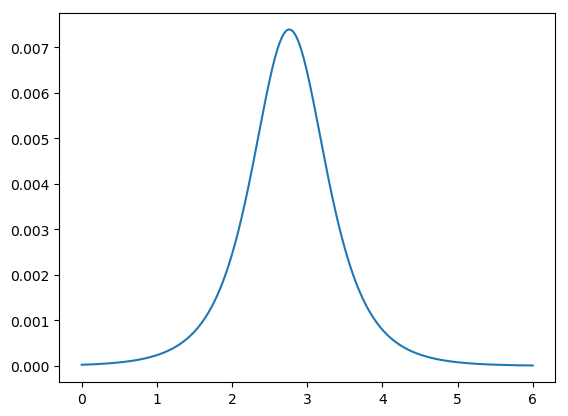

2.77

In [244]:
plt[:plot](muRange, muMarginal)
muMax=findmax(muMarginal)[2][1]*0.01

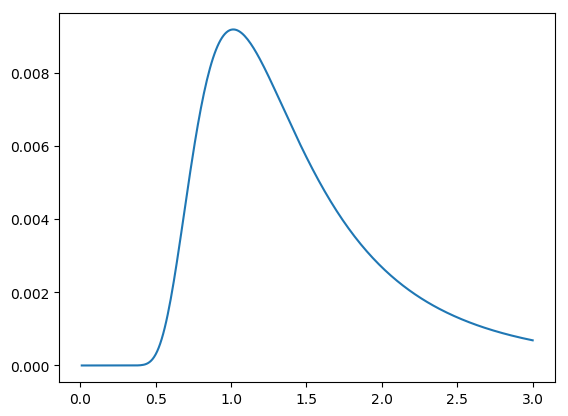

1.01

In [245]:
plot(sigmaRange, sigmaMarginal)
sigmaMax=findmax(sigmaMarginal)[2][1]*0.01

# 4.1.4

In [185]:
p0=0.3
N=30
heads=sum(1*(rand(N) .<p0))

10

In [186]:
#prior distribution
increments=100
prior=zeros(increments) .+ 1/increments


100-element Array{Float64,1}:
 0.01
 0.01
 0.01
 0.01
 0.01
 0.01
 0.01
 0.01
 0.01
 0.01
 0.01
 0.01
 0.01
 ⋮   
 0.01
 0.01
 0.01
 0.01
 0.01
 0.01
 0.01
 0.01
 0.01
 0.01
 0.01
 0.01

In [187]:
p_=collect(1:increments) ./increments

100-element Array{Float64,1}:
 0.01
 0.02
 0.03
 0.04
 0.05
 0.06
 0.07
 0.08
 0.09
 0.1 
 0.11
 0.12
 0.13
 ⋮   
 0.89
 0.9 
 0.91
 0.92
 0.93
 0.94
 0.95
 0.96
 0.97
 0.98
 0.99
 1.0 

In [199]:
L=binomial(N,heads)*(p_[1:increments].^heads) .* ((1 .-p_[1:increments]).^(N-heads))

100-element Array{Float64,1}:
 2.457402620871287e-13 
 2.0539690522113423e-10
 9.64760819369123e-9   
 1.3925057566808009e-7 
 1.0518276285208479e-6 
 5.270380868493999e-6  
 1.987979018187215e-5  
 6.08735797845004e-5   
 0.0001588639534100654 
 0.00036527724108234767
 0.0007577037028979435 
 0.0014429069612353484 
 0.002556177457820574  
 ⋮                     
 6.302693599953445e-13 
 1.0476048962981059e-13
 1.4224484525917888e-14
 1.5047017929617513e-15
 1.1602797454353461e-16
 5.916651219803091e-18 
 1.7155704803916448e-19
 2.1962641983418205e-21
 7.725291259834993e-24 
 2.5741455250191943e-27
 2.7172173009371134e-33
 0.0                   

In [197]:
Norm=sum(L .* prior)

0.03225806451612902

In [198]:
posterior = (1/Norm)* L .* prior

100-element Array{Float64,1}:
 7.617948124700993e-14 
 6.367304061855165e-11 
 2.9907585400442825e-9 
 4.316767845710485e-8  
 3.26066564841463e-7   
 1.6338180692331405e-6 
 6.16273495638037e-6   
 1.8870809733195135e-5 
 4.9247825557120296e-5 
 0.00011323594473552783
 0.0002348881478983626 
 0.0004473011579829582 
 0.0007924150119243783 
 ⋮                     
 1.953835015985569e-13 
 3.2475751785241295e-14
 4.4095902030345474e-15
 4.664575558181431e-16 
 3.596867210849575e-17 
 1.834161878138959e-18 
 5.3182684892141016e-20
 6.808419014859647e-22 
 2.3948402905488488e-24
 7.979851127559506e-28 
 8.423373632905056e-34 
 0.0                   

In [213]:
priorPar=p_ .*(1 .- p_)/(sum( p_ .*(1 .- p_)))
LPar=binomial(N,heads)*(p_[1:increments].^heads) .* ((1 .-p_[1:increments]).^(N-heads))
NormPar=sum(LPar .* priorPar)
posteriorPar = (1/NormPar)* LPar .* priorPar

100-element Array{Float64,1}:
 3.4476656655789626e-15
 5.7051044394222245e-12
 3.978563360698906e-10 
 7.577777612584344e-9  
 7.080302550843192e-8  
 4.212449787645672e-7  
 1.8340299230187973e-6 
 6.349218726231593e-6  
 1.8438385888585827e-5 
 4.658850297690286e-5  
 0.00010512251281942714
 0.00021593143900800163
 0.00040970120159381553
 ⋮                     
 8.744249054399409e-14 
 1.3361452163070695e-14
 1.6509505720161333e-15
 1.5694297649469851e-16
 1.0704276819488322e-17
 4.728993368093134e-19 
 1.1548240148007768e-20
 1.1951693264942194e-22
 3.185821826512984e-25 
 7.149946610293321e-29 
 3.8121782384347467e-35
 0.0                   

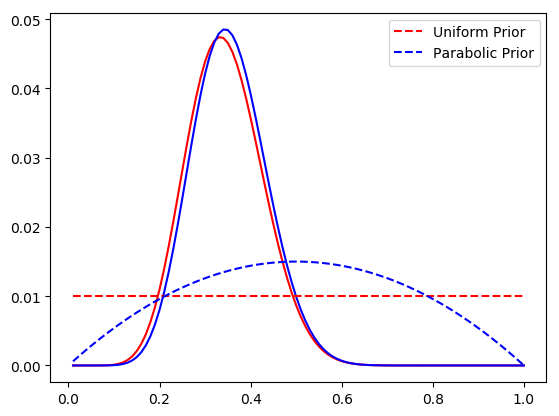

PyObject <matplotlib.legend.Legend object at 0x7f1b40670908>

In [224]:
plt[:plot](p_, posterior, "r")
plt[:plot](p_, posteriorPar, "b")
plt[:plot](p_, prior, "r--", label="Uniform Prior")
plt[:plot](p_, priorPar, "b--", label="Parabolic Prior")
legend()

In [ ]:
ChiSquare1=sum((().^2) ./())

# 7.1.2

# 